In [11]:
%reset

In [25]:
import polars as pl
import matplotlib.pyplot as plt
import seaborn as sns

df_statistics = pl.read_parquet("/Users/maksim/Documents/VSE/Bachelor's thesis/self-corrective-coding-agent/data/adjusted_results.parquet")
df_statistics.head(10)

shape: (10, 23)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ name      ┆ descripti ┆ public_te ┆ private_t ┆ … ┆ is_solved ┆ number_gi ┆ total_num ┆ number_f │
│ ---       ┆ on        ┆ sts       ┆ ests      ┆   ┆ ---       ┆ ven_pub_t ┆ ber_test_ ┆ ailed_te │
│ str       ┆ ---       ┆ ---       ┆ ---       ┆   ┆ bool      ┆ ests      ┆ cases     ┆ st_cases │
│           ┆ str       ┆ struct[2] ┆ struct[2] ┆   ┆           ┆ ---       ┆ ---       ┆ ---      │
│           ┆           ┆           ┆           ┆   ┆           ┆ i64       ┆ i64       ┆ i64      │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ 500_C.    ┆ New Year  ┆ {["3 5    ┆ {["50 50  ┆ … ┆ true      ┆ 1         ┆ 11        ┆ 0        │
│ New Year  ┆ is        ┆ 1 2 3     ┆ 75 71 23  ┆   ┆           ┆           ┆           ┆          │
│ Book      ┆ coming,   ┆ 1 3 2 3 1 ┆ 37 28 23  ┆   ┆           ┆           ┆           ┆          │
│ Reading   ┆ and       ┆ "],["12…  ┆ 69 …      ┆   ┆           ┆           ┆           ┆          │
│           ┆ Jaehyu…   ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 643_B.    ┆ Bearland  ┆ {["1000   ┆ {["1000   ┆ … ┆ true      ┆ 2         ┆ 48        ┆ 0        │
│ Bear and  ┆ has n     ┆ 999       ┆ 1001      ┆   ┆           ┆           ┆           ┆          │
│ Two Paths ┆ cities,   ┆ 10 20 30  ┆ 217 636   ┆   ┆           ┆           ┆           ┆          │
│           ┆ numbere…  ┆ 40        ┆ 713 516   ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ ", "7 …   ┆ "…        ┆   ┆           ┆           ┆           ┆          │
│ 774_D.    ┆ Vasya has ┆ {["4 2 4  ┆ {["5 1 3  ┆ … ┆ true      ┆ 3         ┆ 12        ┆ 0        │
│ Lie or    ┆ a         ┆ 1 1 1 1   ┆ 2 2 2 1 2 ┆   ┆           ┆           ┆           ┆          │
│ Truth     ┆ sequence  ┆ 1 1 1 1   ┆ 2 2 2 1 2 ┆   ┆           ┆           ┆           ┆          │
│           ┆ of cubes  ┆ ", "5…    ┆ "…        ┆   ┆           ┆           ┆           ┆          │
│           ┆ …         ┆           ┆           ┆   ┆           ┆           ┆           ┆          │
│ 278_B.    ┆ Coming up ┆ {["4      ┆ {["3      ┆ … ┆ true      ┆ 2         ┆ 18        ┆ 0        │
│ New       ┆ with a    ┆ aa        ┆ rjnflsbpx ┆   ┆           ┆           ┆           ┆          │
│ Problem   ┆ new       ┆ bdefghijk ┆ qivrcdjpt ┆   ┆           ┆           ┆           ┆          │
│           ┆ problem   ┆ lmn       ┆ j         ┆   ┆           ┆           ┆           ┆          │
│           ┆ i…        ┆ opqrstuvw ┆ vpojo…    ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ …         ┆           ┆   ┆           ┆           ┆           ┆          │
│ 747_C.    ┆ There are ┆ {["8 6    ┆ {["100 1  ┆ … ┆ true      ┆ 3         ┆ 16        ┆ 0        │
│ Servers   ┆ n servers ┆ 1 3 20    ┆ 1000000   ┆   ┆           ┆           ┆           ┆          │
│           ┆ in a      ┆ 4 2 1     ┆ 100 1000  ┆   ┆           ┆           ┆           ┆          │
│           ┆ labor…    ┆ 6 5 5     ┆ ", "…     ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ 10 1…     ┆           ┆   ┆           ┆           ┆           ┆          │
│ 1068_D.   ┆ Ivan unex ┆ {["3      ┆ {["8      ┆ … ┆ false     ┆ 2         ┆ 18        ┆ 15       │
│ Array     ┆ pectedly  ┆ 1 -1 2    ┆ -1 -1 -1  ┆   ┆           ┆           ┆           ┆          │
│ Without   ┆ saw a     ┆ ", "2     ┆ 59 -1 -1  ┆   ┆           ┆           ┆           ┆          │
│ Local Ma… ┆ presen…   ┆ -1 -1     ┆ -1 -1     ┆   ┆           ┆           ┆           ┆          │
│           ┆           ┆ "],["1…   ┆ "…        ┆   ┆           ┆           ┆           ┆          │
│ 999_F.    ┆ There are ┆ {["4 3    ┆ {["1 1    ┆ … ┆ false     ┆ 2         ┆ 7         ┆ 3        │
│ Cards and ┆ n players ┆ 1 3 2 8 5 ┆ 1      

# Stats and Charts

- **Pass Rate**:
    - `pass@k(1 and 3)` / `total number of solved tests overall`
    - `pass@k(1 and 3)` / `number of solved tests per difficulty level`

- **Attempts**:
    - Number of `k` debugging tries (iterations) required for successful solutions

- **Solution & Failure Counts**:
    - Number of **solved** and **failed** tests for failed to solve problems    

- **LLM Calls**:
    - **Total** and **average** number of LLM calls per solved and failed to solve problems

- **Performance Metrics**:
    - **Average time** to solve for solved problems
    - **Average USD cost** for solved problems
    - **Average token cost** for solved problems

- **Algorithm Types**:
    - **Histogram** of algorithm types in the `algorith_name` column
    - Proportion of **algorithm types** that correctly match at least one label in the `cf_tags` column

- **Failure Analysis**:
    - Average number of **failed tests per difficulty level**

- **Solve Rate Analysis**:
    - Check **solve rate dependency** based on the number of given public tests

In [13]:
# Stats and charts:
# pass_k(1 and 3)/ num of solved overall, pass_k(1 and 3)/ num of solved per difficulty level, k tries for solved, number of solved and failed tests for failed, total and average llm calls for solved, average time to solve, average usd cost for solved, average token cost for solved, algorithm types histogram, algorithm types correctly matches one of in cf_tags column, average failed tests per dif level, check solve rate dependency on number of given public tests


In [15]:
df_statistics.describe()

statistic,name,description,public_tests,private_tests,cf_index,cf_tags,solution_algorithm_name,pass_k,k_tries,exec_time_sec,total_llm_calls,total_input_tokens,total_output_tokens,total_tokens,total_costs_usd,k_debug,t_plan,programming_language,code_solution,is_solved,number_given_pub_tests,total_number_test_cases,number_failed_test_cases
str,str,str,f64,f64,str,f64,str,f64,f64,f64,f64,f64,f64,f64,f64,f64,f64,str,str,f64,f64,f64,f64
"""count""","""117""","""117""",117.0,117.0,"""117""",117.0,"""117""",117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,117.0,"""117""","""117""",117.0,117.0,117.0,117.0
"""null_count""","""0""","""0""",0.0,0.0,"""0""",0.0,"""0""",0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,"""0""","""0""",0.0,0.0,0.0,0.0
"""mean""",null,null,null,null,null,null,null,3.102564,2.102564,183.930537,10.08547,13693.353333,7252.637094,20945.990427,0.10676,3.0,3.0,null,null,0.350427,2.196581,27.897436,11.401709
"""std""",null,null,null,null,null,null,null,1.341542,1.341542,81.182039,1.380733,2885.404069,1523.033252,4266.305578,0.021746,0.0,0.0,null,null,null,0.967037,36.314095,22.193141
"""min""","""1034_A. Enlarge GCD""","""A couple of friends, Axel and …",null,null,"""A""",null,"""Arithmetic Calculation""",1.0,0.0,58.84,6.0,8205.0,3727.0,12468.0,0.0591225,3.0,3.0,"""python""","""def solve(input_str): data…",0.0,1.0,2.0,0.0
"""25%""",null,null,null,null,null,null,null,1.0,0.0,132.06,8.0,11316.0,6086.0,17301.0,0.088675,3.0,3.0,null,null,null,2.0,9.0,0.0
"""50%""",null,null,null,null,null,null,null,4.0,3.0,163.36,11.0,13894.0,7196.0,21323.0,0.1067375,3.0,3.0,null,null,null,2.0,18.0,3.0
"""75%""",null,null,null,null,null,null,null,4.0,3.0,222.7,11.0,15457.0,8249.0,24042.0,0.1212425,3.0,3.0,null,null,null,3.0,33.0,13.0
"""max""","""999_F. Cards and Joy""","""ZS the Coder is playing a game…",null,null,"""F""",null,"""Union-Find with Cycle Check fo…",4.0,3.0,440.61,11.0,21200.0,12053.0,31192.0,0.168377,3.0,3.0,"""python""","""import sys import math from sc…",1.0,6.0,303.0,123.0


In [16]:
df = df_statistics.clone()

In [21]:
# Total number of problems
total_problems = df.shape[0]

# pass@1: Number of problems solved in 1 attempt
pass_at_1 = df.filter(pl.col('pass_k') <= 1).filter(pl.col('is_solved') == True).shape[0] / total_problems

# pass@4: Number of problems solved in 4 or fewer attempts
pass_at_4 = df.filter(pl.col('pass_k') <= 4).filter(pl.col('is_solved') == True).shape[0] / total_problems

print(f"Overall pass@1 rate: {pass_at_1:.2%}")
print(f"Overall pass@4 rate: {pass_at_4:.2%}")

Overall pass@1 rate: 26.50%
Overall pass@3 rate: 35.04%


In [27]:
# Group by difficulty level and calculate pass@k
difficulty_levels = df.select('cf_index').unique().to_series().to_list()

pass_rates = []

for level in difficulty_levels:
    df_level = df.filter(pl.col('cf_index') == level)
    total_level = df_level.shape[0]

    pass_at_1_level = df_level.filter(pl.col('pass_k') <= 1).filter(pl.col('is_solved') == True).shape[0] / total_level
    pass_at_4_level = df_level.filter(pl.col('pass_k') <= 4).filter(pl.col('is_solved') == True).shape[0] / total_level

    pass_rates.append({
        'Difficulty Level': level,
        'pass@1': round(pass_at_1_level, 2),
        'pass@4': round(pass_at_4_level, 2)
    })

# Convert to DataFrame
df_pass_rates = pl.DataFrame(pass_rates)

# Display the pass rates per difficulty level
df_pass_rates

Difficulty Level,pass@1,pass@4
str,f64,f64
"""D""",0.21,0.26
"""E""",0.17,0.17
"""B""",0.35,0.45
"""F""",0.1,0.2
"""A""",0.45,0.6
"""C""",0.3,0.4


/var/folders/2j/8h9qglp54372nn_97wxyrbp00000gn/T/ipykernel_1387/2549742882.py:5: DeprecationWarning: `DataFrame.melt` is deprecated. Use `unpivot` instead, with `index` instead of `id_vars` and `on` instead of `value_vars`
  df_melted = df_pass_rates.melt(


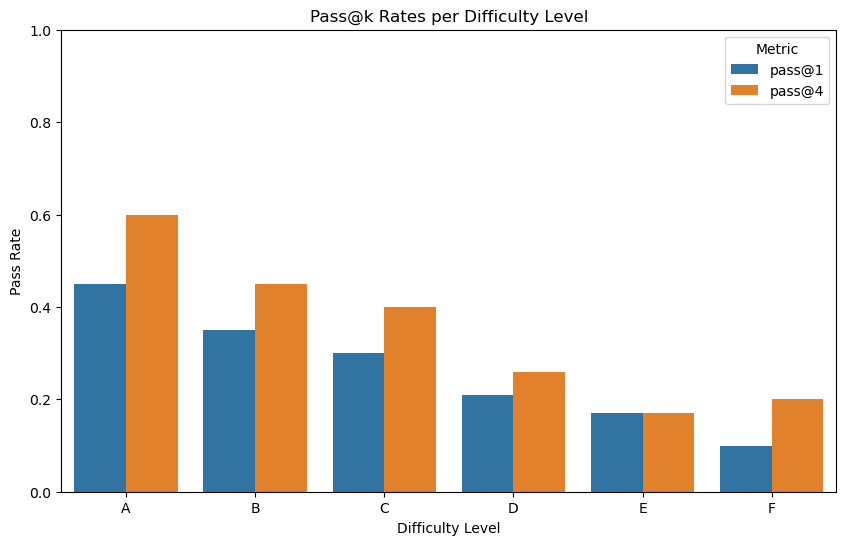

In [43]:
# Sort the Polars DataFrame by 'Difficulty Level'
df_pass_rates = df_pass_rates.sort('Difficulty Level')

# Melt the DataFrame for easier plotting and convert to pandas for plotting compatibility
df_melted = df_pass_rates.melt(
    id_vars='Difficulty Level',
    value_vars=['pass@1', 'pass@4'],
    variable_name='Metric',
    value_name='Pass Rate'
).sort('Difficulty Level').to_pandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=df_melted, x='Difficulty Level', y='Pass Rate', hue='Metric')
plt.title('Pass@k Rates per Difficulty Level')
plt.ylabel('Pass Rate')
plt.xlabel('Difficulty Level')
plt.ylim(0, 1)
plt.show()

/var/folders/2j/8h9qglp54372nn_97wxyrbp00000gn/T/ipykernel_1387/1487957860.py:5: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  attempts_distribution = df_solved.group_by('k_tries').count().select(['k_tries', 'count'])


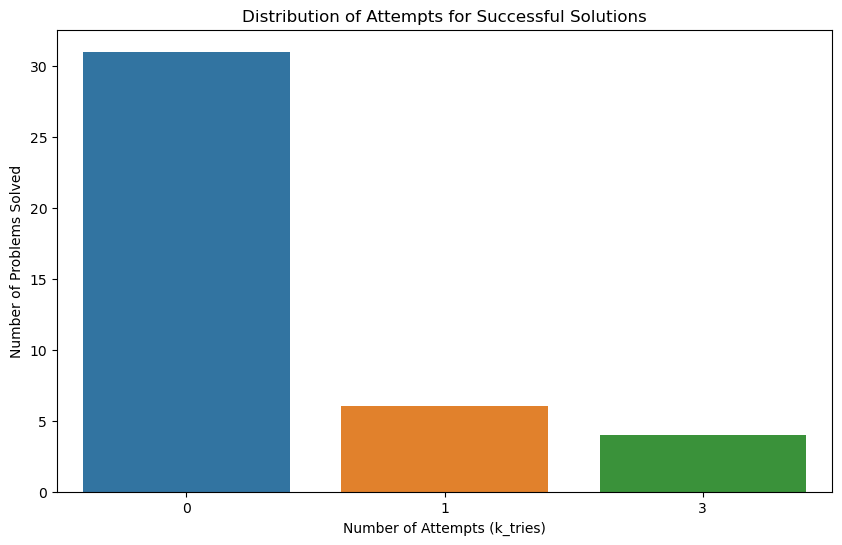

In [42]:
# Filter only successful solutions
df_solved = df.filter(pl.col('is_solved') == True)

# Count of k_tries
attempts_distribution = df_solved.group_by('k_tries').count().select(['k_tries', 'count'])

# Convert to pandas for plotting
attempts_distribution_pd = attempts_distribution.to_pandas()

# Plotting
plt.figure(figsize=(10, 6))
sns.barplot(data=attempts_distribution_pd, x='k_tries', y='count')
plt.title('Distribution of Attempts for Successful Solutions')
plt.ylabel('Number of Problems Solved')
plt.xlabel('Number of Attempts (k_tries)')
plt.show()

In [46]:
# Filter unsolved problems
df_unsolved = df.filter(pl.col('is_solved') == False)

# Calculate total and failed test cases
df_unsolved = df_unsolved.with_columns([
    (pl.col('total_number_test_cases') - pl.col('number_failed_test_cases')).alias('number_passed_test_cases')
])

# Sum over all unsolved problems
total_failed_tests = df_unsolved.select(pl.sum('number_failed_test_cases')).item()
total_passed_tests = df_unsolved.select(pl.sum('number_passed_test_cases')).item()

print(f"Total failed tests in unsolved problems: {total_failed_tests}, rate: {total_failed_tests / (total_failed_tests+total_passed_tests) * 100:.2f}%")
print(f"Total passed tests in unsolved problems: {total_passed_tests}, rate: {total_passed_tests / (total_failed_tests+total_passed_tests) * 100:.2f}%")


Total failed tests in unsolved problems: 1334, rate: 62.63%
Total passed tests in unsolved problems: 796, rate: 37.37%


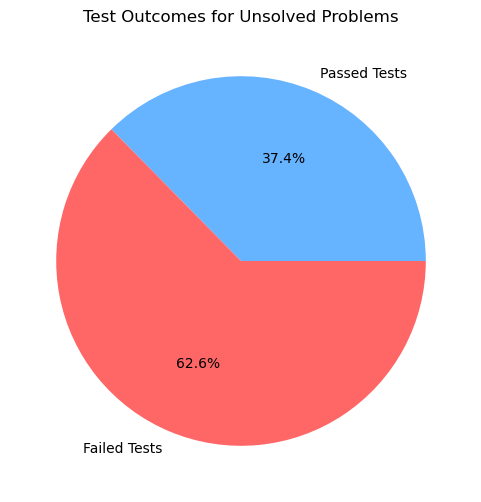

In [47]:
# Data for pie chart
labels = ['Passed Tests', 'Failed Tests']
sizes = [total_passed_tests, total_failed_tests]

# Plotting
plt.figure(figsize=(6, 6))
plt.pie(sizes, labels=labels, autopct='%1.1f%%', colors=['#66b3ff', '#ff6666'])
plt.title('Test Outcomes for Unsolved Problems')
plt.show()

In [ ]:
# add failure average rate per difficult level

In [49]:
import polars as pl

# Filter only successful solutions
df_solved = df.filter(pl.col('is_solved') == True)
df_unsolved = df.filter(pl.col('is_solved') == False)

# Total and average LLM calls for solved problems
df_solved_llm = (
    df_solved
    .select(
        pl.sum('total_llm_calls').alias('total_llm_calls_solved'),
        pl.mean('total_llm_calls').alias('avg_llm_calls_solved')
    )
)
total_llm_calls_solved = df_solved_llm['total_llm_calls_solved'][0]
avg_llm_calls_solved = df_solved_llm['avg_llm_calls_solved'][0]

# Total and average LLM calls for unsolved problems
df_unsolved_llm = (
    df_unsolved
    .select(
        pl.sum('total_llm_calls').alias('total_llm_calls_unsolved'),
        pl.mean('total_llm_calls').alias('avg_llm_calls_unsolved')
    )
)
total_llm_calls_unsolved = df_unsolved_llm['total_llm_calls_unsolved'][0]
avg_llm_calls_unsolved = df_unsolved_llm['avg_llm_calls_unsolved'][0]

print("Solved Problems:")
print(f"Total LLM Calls: {total_llm_calls_solved:.0f}")
print(f"Average LLM Calls: {avg_llm_calls_solved:.2f}")

print("\nUnsolved Problems:")
print(f"Total LLM Calls: {total_llm_calls_unsolved:.0f}")
print(f"Average LLM Calls: {avg_llm_calls_unsolved:.2f}")

Solved Problems:
Total LLM Calls: 344
Average LLM Calls: 8.39

Unsolved Problems:
Total LLM Calls: 836
Average LLM Calls: 11.00


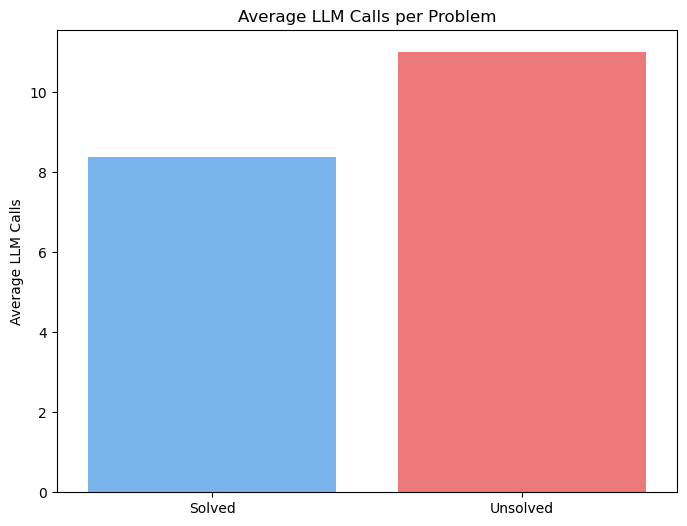

In [50]:
# Data for bar chart
categories = ['Solved', 'Unsolved']
avg_llm_calls = [avg_llm_calls_solved, avg_llm_calls_unsolved]

# Plotting
plt.figure(figsize=(8, 6))
sns.barplot(x=categories, y=avg_llm_calls, palette=['#66b3ff', '#ff6666'])
plt.title('Average LLM Calls per Problem')
plt.ylabel('Average LLM Calls')
plt.show()

In [54]:
avg_time_solved = df_solved.select(pl.mean('exec_time_sec'))[0, 0]
print(f"Average Time to Solve (Solved Problems): {avg_time_solved:.2f} seconds")

avg_cost_solved = df_solved.select(pl.mean('total_costs_usd'))[0, 0]
print(f"Average Cost (Solved Problems): ${avg_cost_solved:.4f}")

avg_token_cost_solved = df_solved.select(pl.mean('total_tokens'))[0, 0]
print(f"Average Token Cost (Solved Problems): {avg_token_cost_solved:.2f} tokens")

Average Time to Solve (Solved Problems): 151.29 seconds
Average Cost (Solved Problems): $0.0883
Average Token Cost (Solved Problems): 17082.46 tokens


### TODO

/var/folders/2j/8h9qglp54372nn_97wxyrbp00000gn/T/ipykernel_1387/1433124454.py:2: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  algo_counts = df.group_by('solution_algorithm_name').count().select(['solution_algorithm_name', 'count']).to_pandas()


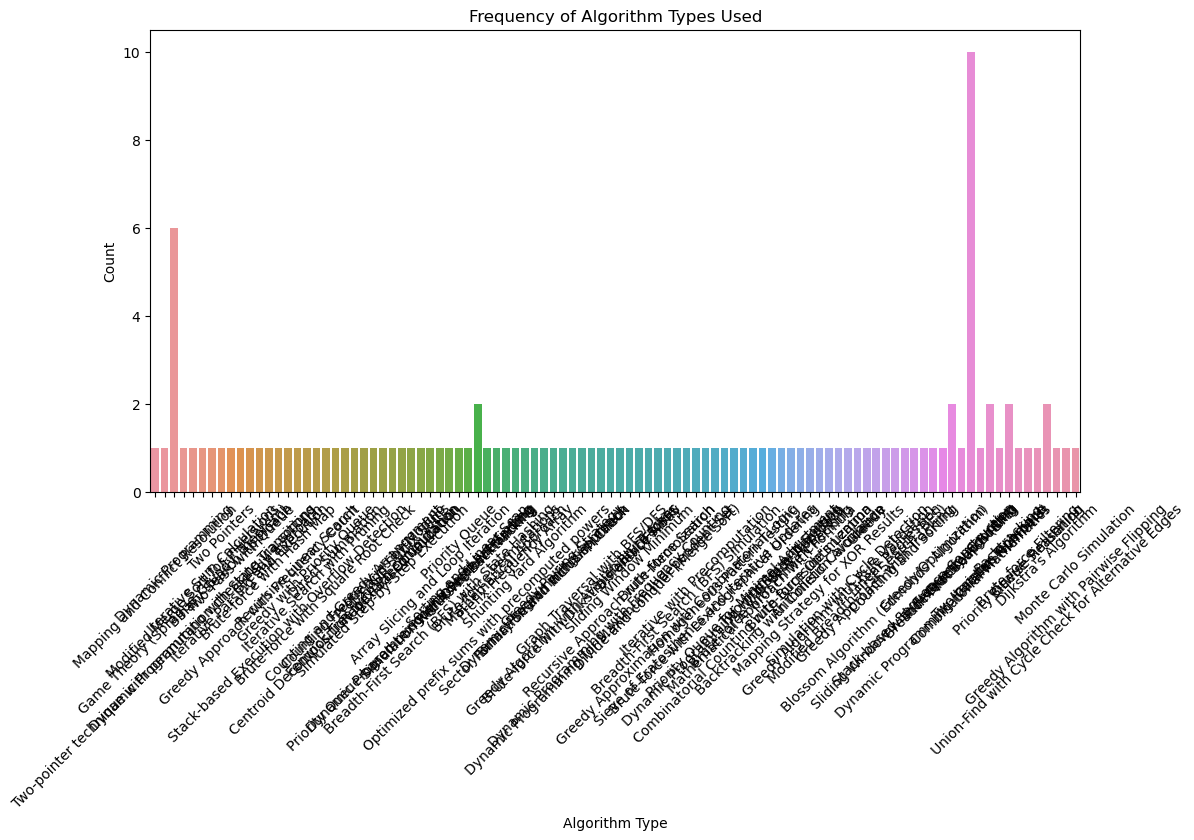

In [57]:
# Count of algorithm types
algo_counts = df.group_by('solution_algorithm_name').count().select(['solution_algorithm_name', 'count']).to_pandas()

# Plotting
plt.figure(figsize=(12, 6))
sns.barplot(data=algo_counts, x='solution_algorithm_name', y='count')
plt.title('Frequency of Algorithm Types Used')
plt.ylabel('Count')
plt.xlabel('Algorithm Type')
plt.xticks(rotation=45)
plt.show()

In [61]:
# import polars as pl
# 
# def check_algo_match(row):
#     algo = row['solution_algorithm_name']
#     tags = row['cf_tags'].split(',')
#     return int(algo in tags)
# 
# # Apply the function
# df = df.with_columns(
#     pl.Series('algo_matches_tag', df.scan(check_algo_match))
# )
# 
# # Calculate the proportion
# correct_algo_selection = df['algo_matches_tag'].mean()
# print(f"Proportion of Correct Algorithm Selection: {correct_algo_selection:.2%}")

AttributeError: 'DataFrame' object has no attribute 'scan'

In [97]:
# Filter unsolved problems
df_unsolved = df.filter(pl.col('is_solved') == False)

# Calculate total and failed test cases
df_unsolved = df_unsolved.with_columns([
    (pl.col('total_number_test_cases') - pl.col('number_failed_test_cases')).alias('number_passed_test_cases')
])

# Group by difficulty level and calculate failed/total test case rate
failed_tests_rate = (
    df_unsolved
    .group_by('cf_index')
    .agg(
        pl.sum('number_failed_test_cases').alias('total_failed_tests'),
        pl.sum('number_passed_test_cases').alias('total_passed_tests'),
        (pl.sum('number_failed_test_cases') / (pl.sum('number_failed_test_cases') + pl.sum('number_passed_test_cases'))) * 100
    )
    .sort('cf_index')
)
failed_tests_rate

cf_index,total_failed_tests,total_passed_tests,number_failed_test_cases
str,i64,i64,f64
"""A""",83,83,50.0
"""B""",181,62,74.485597
"""C""",116,212,35.365854
"""D""",265,136,66.084788
"""E""",332,158,67.755102
"""F""",357,145,71.115538


Average Debugging Attempts for Solved Problems: 0.44


/var/folders/2j/8h9qglp54372nn_97wxyrbp00000gn/T/ipykernel_1387/2834447821.py:7: DeprecationWarning: `GroupBy.count` is deprecated. It has been renamed to `len`.
  k_tries_counts = df_solved.group_by('k_tries').count().sort('k_tries')


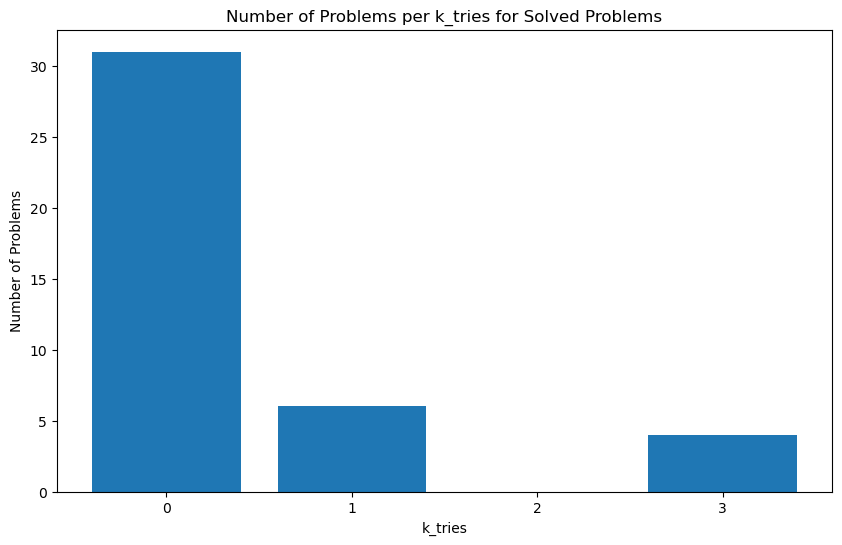

In [119]:
# Average k_debug for solved and unsolved problems
avg_k_debug_solved = df_solved.select(pl.mean('k_tries'))[0, 0]
avg_k_debug_unsolved = df_unsolved.select(pl.mean('k_tries'))[0, 0]

print(f"Average Debugging Attempts for Solved Problems: {avg_k_debug_solved:.2f}")
# Count occurrences of each `k_tries` value
k_tries_counts = df_solved.group_by('k_tries').count().sort('k_tries')

# Extract values for plotting
k_tries_values = k_tries_counts['k_tries']
k_tries_counts_values = k_tries_counts['count']

# Plotting
plt.figure(figsize=(10, 6))
plt.bar(k_tries_values, k_tries_counts_values)
plt.xlabel('k_tries')
plt.ylabel('Number of Problems')
plt.title('Number of Problems per k_tries for Solved Problems')

# Set x-axis to show only integer values within the range
plt.xticks(range(0, 4))  # Display integers from 0 to 3

plt.show()